In [1]:
import soundfile as sf

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from signalTeste import *
import time
import pickle
import wave
import peakutils
import scipy.signal as signal
%matplotlib inline

In [90]:
sig = signalMeu()
fs = 48000
sd.default.samplerate = fs
sd.default.channels = 1

### Abrindo o arquivo

In [17]:
data, fs = sf.read('smnsh.wav')

In [22]:
fs

48000

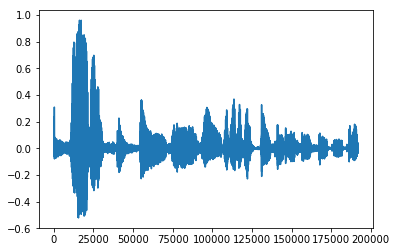

In [18]:
plt.plot(data)
plt.show()

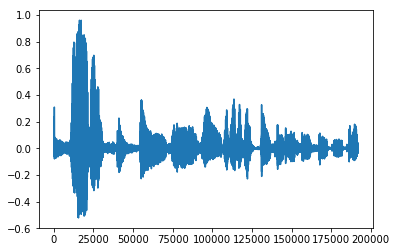

In [25]:
sd.play(data)
sd.wait()
plt.plot(data)
plt.show()

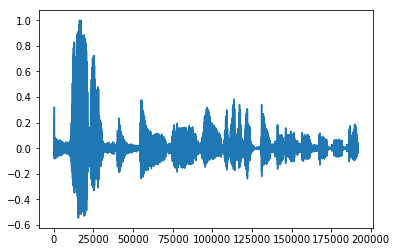

In [48]:
normdata = data/max(data)
plt.plot(normdata)
plt.show()

#### Filtrando o signal

In [121]:
nyq_rate = fs/2
width = 5.0/nyq_rate
ripple_db = 60.0 #dB
N , beta = signal.kaiserord(ripple_db, width)
cutoff_hz = 4000.0
taps = signal.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
yFiltrado = signal.lfilter(taps, 1.0, normdata)

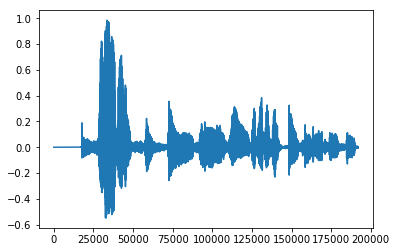

In [122]:
plt.plot(yFiltrado)
plt.show()

In [123]:
yFiltradoT = yFiltrado[17805:]
print(yFiltradoT[0])

0.02803845644861198


In [124]:
#plt.plot(yFiltradoT)
#plt.plot(normdata)
#plt.show()

In [125]:
len(yFiltradoT)/fs

3.6290625

In [126]:
time, carrier = sig.generateSin(14000, 1, len(yFiltradoT)/fs, fs)

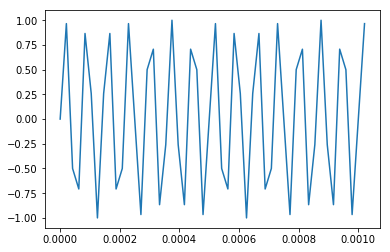

In [127]:
plt.plot(time[0:50],carrier[0:50])
plt.show()

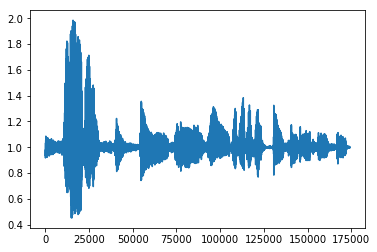

In [152]:
plt.plot(yFiltradoT+1)
plt.show()

In [153]:
modulada = np.multiply(carrier,(yFiltradoT))

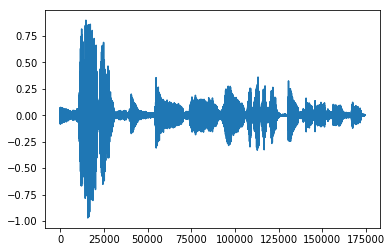

In [154]:
plt.plot(modulada)
plt.show()

In [156]:
sd.play(modulada)